# - Exploratory Data Analysis
## Objectif :
- Comprendre du mieux possible nos données
- Développer une premiere strategie de modelisation

## Checklist de base :
### Analyse de la forme :
- **lignes et colonnes** : Training set : (82332, 45), Test set : (175341, 45)
- **types de variables** : int64: 30, float64: 11, object: 4
- **variable target** : attack_cat

- **analyse des valeurs manquantes** 
    - Pas de NaN ni de valeurs manquantes
    - il existe des colonnes avec beacoup de zeros (5 colonnes avec plus de 90% de zeros)
- **analyse des lignes dupliquées** : 
    - Training set : nombre de lignes dupliquees :  26387
    - Test set : nombre de lignes dupliquees :  67601 

### Analyse de fond :
- **visualisation du target** : attack_cat : 10 catégories:
    - Training set : (Normal->45%, Generic->23%, Exploits->14%, Fuzzers->7%, DoS->5%, Reconnaissance->4%, Analysis->0.8%, Backdoor->0.7%, Shellcode->0.4%, Worms->0.005%)

    - Test set : (Normal->31.94%, Generic-> 22.81%, Exploits-> 19.04%, Fuzzers-> 10.37%, DoS-> 7%, Reconnaissance-> 5.98%, Analysis-> 1.14%, Backdoor-> 1%, Shellcode-> 0.65%, Worms-> 0.07%)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_row", 45)
pd.set_option("display.max_column", 45)
data = pd.read_csv("UNSW_NB15_training-set.csv")
data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0


In [3]:
df = data.copy()
print("Dimensions Training set : ", df.shape)

Dimensions Training set :  (82332, 45)


In [4]:
df.dtypes    # retourne le type de chaque variable

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

In [5]:
df.dtypes.value_counts()

int64      30
float64    11
object      4
dtype: int64

<BarContainer object of 10 artists>

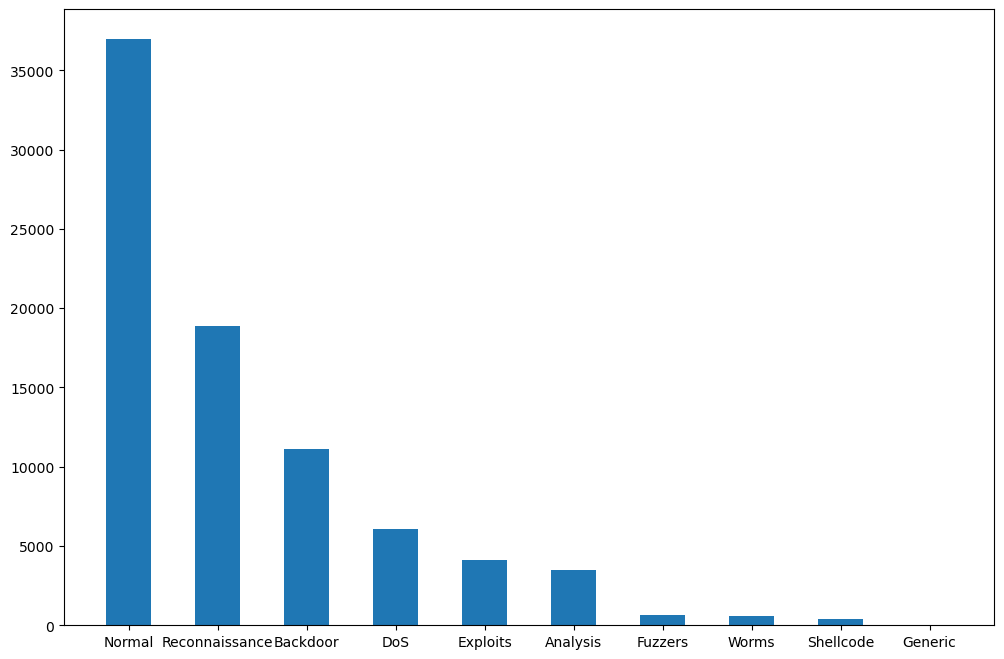

In [6]:
plt.figure(figsize=(12, 8))
plt.bar(df["attack_cat"].unique(), df["attack_cat"].value_counts(), width = 0.5)

<Axes: >

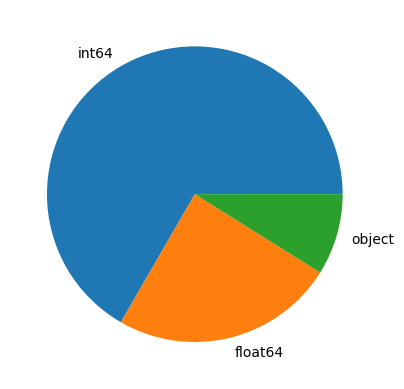

In [7]:
df.dtypes.value_counts().plot.pie()

In [8]:
df.isna().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [9]:
df.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [10]:
df = df.drop("id", axis=1)    # suppression de la colonne des id
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0


In [11]:
df[df["attack_cat"] == "Analysis"]

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
248,0.000009,gre,-,INT,2,0,156,0,111111.107200,254,0,6.933333e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,78,0,0,0,1,2,1,1,1,63,0,0,0,1,1,0,Analysis,1
461,0.000005,ggp,-,INT,2,0,180,0,200000.005100,254,0,1.440000e+08,0.000000,0,0,0.005000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,90,0,0,0,4,2,3,4,3,3,0,0,0,5,3,0,Analysis,1
532,0.000008,prm,-,INT,2,0,200,0,125000.000300,254,0,1.000000e+08,0.000000,0,0,0.008000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,100,0,0,0,6,2,1,1,1,6,0,0,0,1,6,0,Analysis,1
589,0.000009,netblt,-,INT,2,0,200,0,111111.107200,254,0,8.888889e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,100,0,0,0,4,2,3,2,2,4,0,0,0,3,4,0,Analysis,1
634,0.000009,sdrp,-,INT,2,0,200,0,111111.107200,254,0,8.888889e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,100,0,0,0,7,2,1,1,1,7,0,0,0,1,7,0,Analysis,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65648,0.650565,tcp,-,FIN,10,10,808,1196,29.205382,62,252,8.952218e+03,13243.872070,2,2,72.285000,66.628555,4647.903134,116.429539,255,27085696,318389529,255,0.127240,0.050226,0.077014,81,120,0,0,5,1,3,2,1,2,0,0,0,2,9,0,Analysis,1
65650,0.622273,tcp,-,FIN,10,8,820,1074,27.319198,62,252,9.487797e+03,12084.727540,2,2,69.141444,75.768141,3481.838171,137.491516,255,2313099043,1305852656,255,0.201912,0.068296,0.133616,82,134,0,0,5,1,1,1,1,1,0,0,0,1,7,0,Analysis,1
65651,0.461595,tcp,-,FIN,10,8,822,1366,36.828822,62,252,1.282510e+04,20728.126950,2,2,51.288333,57.334145,2694.765661,83.404703,255,312317931,1001128701,255,0.114614,0.049252,0.065362,82,171,0,0,5,1,3,2,1,2,0,0,0,2,7,0,Analysis,1
65703,0.000004,unas,-,INT,2,0,200,0,90909.090200,254,0,7.272727e+07,0.000000,0,0,0.011000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,100,0,0,0,11,2,4,4,4,4,0,0,0,8,11,0,Analysis,1


In [12]:
df["service"].value_counts()

-           47153
dns         21367
http         8287
smtp         1851
ftp          1552
ftp-data     1396
pop3          423
ssh           204
ssl            30
snmp           29
dhcp           26
radius          9
irc             5
Name: service, dtype: int64

### Histogrammes des variables continues

In [13]:
for col in df.select_dtypes("int"):    # colonnes de type int
    # plt.figure()
    # sns.distplot(df[col])    # les variables ne sont pas normalisées
    print(col)

spkts
dpkts
sbytes
dbytes
sttl
dttl
sloss
dloss
swin
stcpb
dtcpb
dwin
smean
dmean
trans_depth
response_body_len
ct_srv_src
ct_state_ttl
ct_dst_ltm
ct_src_dport_ltm
ct_dst_sport_ltm
ct_dst_src_ltm
is_ftp_login
ct_ftp_cmd
ct_flw_http_mthd
ct_src_ltm
ct_srv_dst
is_sm_ips_ports
label


In [14]:
for col in df.select_dtypes("float"):    # colonnes de type float
    print(col)

dur
rate
sload
dload
sinpkt
dinpkt
sjit
djit
tcprtt
synack
ackdat


In [15]:
for col in df.select_dtypes("object"):    # colonnes de type object
    print(col)

proto
service
state
attack_cat


### Colonnes avec des valeurs nulles 

In [16]:
((df[df.columns] == 0).sum() / df.shape[0]).sort_values()

smean                0.000000
proto                0.000000
service              0.000000
state                0.000000
spkts                0.000000
ct_srv_src           0.000000
sbytes               0.000000
attack_cat           0.000000
ct_dst_ltm           0.000000
ct_src_dport_ltm     0.000000
ct_dst_sport_ltm     0.000000
ct_dst_src_ltm       0.000000
ct_srv_dst           0.000000
ct_src_ltm           0.000000
sinpkt               0.002198
dur                  0.011539
sload                0.012134
rate                 0.012134
sttl                 0.012729
ct_state_ttl         0.207028
dbytes               0.437327
dpkts                0.437327
dmean                0.437327
dload                0.437412
dinpkt               0.437436
dttl                 0.438068
label                0.449400
sjit                 0.469441
swin                 0.476570
sloss                0.477579
stcpb                0.496538
dtcpb                0.496696
dwin                 0.496818
tcprtt    

In [17]:
# def variance(df):
#     var = []
#     for cols in df.columns:
#         if ((df[cols] == 0).sum() / df.shape[0]) > 0.9:
#             var.append(cols)

#     return var

In [18]:
# cols = variance(df)
# print(cols)

### Variable Target

In [19]:
df["attack_cat"].value_counts()

Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64

In [20]:
df["attack_cat"].value_counts(normalize=True)

Normal            0.449400
Generic           0.229206
Exploits          0.135209
Fuzzers           0.073629
DoS               0.049665
Reconnaissance    0.042462
Analysis          0.008223
Backdoor          0.007081
Shellcode         0.004591
Worms             0.000534
Name: attack_cat, dtype: float64

### Variables qualitatives

In [21]:
for col in df.select_dtypes("object"):    
    print(f"{col :-<20} {df[col].unique()}")    # les valeurs possibles de chaque colonne, proto : 131 valeur unique

proto--------------- ['udp' 'arp' 'tcp' 'igmp' 'ospf' 'sctp' 'gre' 'ggp' 'ip' 'ipnip' 'st2'
 'argus' 'chaos' 'egp' 'emcon' 'nvp' 'pup' 'xnet' 'mux' 'dcn' 'hmp' 'prm'
 'trunk-1' 'trunk-2' 'xns-idp' 'leaf-1' 'leaf-2' 'irtp' 'rdp' 'netblt'
 'mfe-nsp' 'merit-inp' '3pc' 'idpr' 'ddp' 'idpr-cmtp' 'tp++' 'ipv6' 'sdrp'
 'ipv6-frag' 'ipv6-route' 'idrp' 'mhrp' 'i-nlsp' 'rvd' 'mobile' 'narp'
 'skip' 'tlsp' 'ipv6-no' 'any' 'ipv6-opts' 'cftp' 'sat-expak' 'ippc'
 'kryptolan' 'sat-mon' 'cpnx' 'wsn' 'pvp' 'br-sat-mon' 'sun-nd' 'wb-mon'
 'vmtp' 'ttp' 'vines' 'nsfnet-igp' 'dgp' 'eigrp' 'tcf' 'sprite-rpc' 'larp'
 'mtp' 'ax.25' 'ipip' 'aes-sp3-d' 'micp' 'encap' 'pri-enc' 'gmtp' 'ifmp'
 'pnni' 'qnx' 'scps' 'cbt' 'bbn-rcc' 'igp' 'bna' 'swipe' 'visa' 'ipcv'
 'cphb' 'iso-tp4' 'wb-expak' 'sep' 'secure-vmtp' 'xtp' 'il' 'rsvp' 'unas'
 'fc' 'iso-ip' 'etherip' 'pim' 'aris' 'a/n' 'ipcomp' 'snp' 'compaq-peer'
 'ipx-n-ip' 'pgm' 'vrrp' 'l2tp' 'zero' 'ddx' 'iatp' 'stp' 'srp' 'uti' 'sm'
 'smp' 'isis' 'ptp' 'fire' 'crtp' 

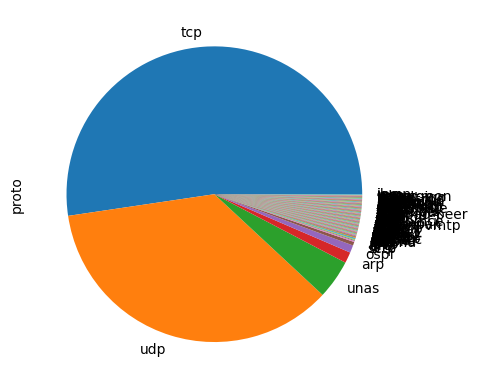

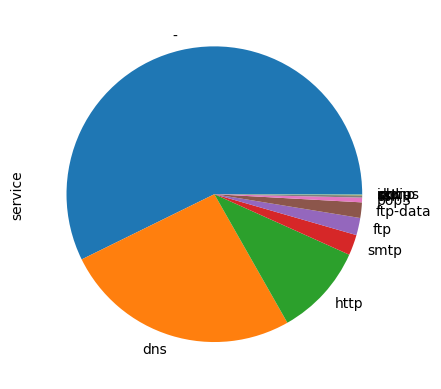

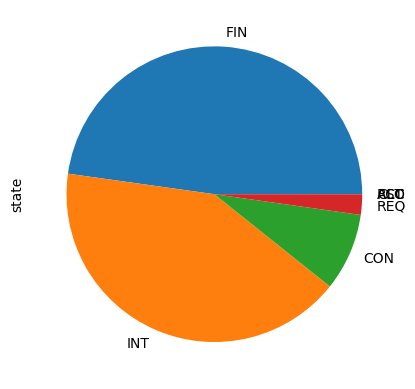

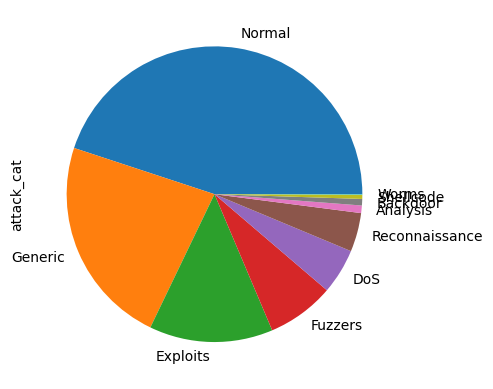

In [22]:
for col in df.select_dtypes("object"):    # repartition de chaque variable
    plt.figure()
    df[col].value_counts().plot.pie()

In [23]:
df[df["label"] == 1]

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
243,0.921987,ospf,-,INT,20,0,1280,0,20.607666,254,0,1.055112e+04,0.000000,0,0,48.525633,0.000000,52.253805,0.000000,0,0,0,0,0.000000,0.000000,0.000000,64,0,0,0,1,2,1,1,1,2,0,0,0,1,1,0,Reconnaissance,1
244,0.921987,ospf,-,INT,20,0,1280,0,20.607666,254,0,1.055112e+04,0.000000,0,0,48.525633,0.000000,52.253805,0.000000,0,0,0,0,0.000000,0.000000,0.000000,64,0,0,0,1,2,1,1,1,2,0,0,0,1,1,0,Reconnaissance,1
245,0.921987,ospf,-,INT,20,0,1280,0,20.607666,254,0,1.055112e+04,0.000000,0,0,48.525633,0.000000,52.253805,0.000000,0,0,0,0,0.000000,0.000000,0.000000,64,0,0,0,1,2,1,1,1,2,0,0,0,1,1,0,Backdoor,1
246,0.921987,ospf,-,INT,20,0,1280,0,20.607666,254,0,1.055112e+04,0.000000,0,0,48.525633,0.000000,52.253805,0.000000,0,0,0,0,0.000000,0.000000,0.000000,64,0,0,0,1,2,1,1,1,2,0,0,0,1,1,0,DoS,1
247,0.000009,sctp,-,INT,2,0,104,0,111111.107200,254,0,4.622222e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,52,0,0,0,1,2,2,1,1,2,0,0,0,1,1,0,Exploits,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65847,0.000012,udp,-,INT,2,0,1510,0,83333.330390,254,0,5.033333e+08,0.000000,0,0,0.012000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,755,0,0,0,7,2,1,1,1,1,0,0,0,1,5,0,Fuzzers,1
65848,20.542910,udp,-,INT,4,0,1216,0,0.146036,254,0,3.551590e+02,0.000000,0,0,6847.637500,0.000000,9684.009000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,304,0,0,0,8,2,1,1,1,1,0,0,0,1,6,0,Fuzzers,1
65849,20.542910,udp,-,INT,4,0,1216,0,0.146036,254,0,3.551590e+02,0.000000,0,0,6847.637500,0.000000,9684.009000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,304,0,0,0,8,2,1,1,1,1,0,0,0,1,6,0,Fuzzers,1
65850,0.627022,tcp,-,FIN,10,6,590,268,23.922605,254,252,6.774882e+03,2857.953857,2,1,69.669111,110.819797,3539.085239,187.036922,255,3355187755,3247085936,255,0.126341,0.072123,0.054218,59,45,0,0,5,1,2,1,1,1,0,0,0,1,5,0,Fuzzers,1


In [24]:
df[:10]

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.09020,254,0,1.803636e+08,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.00030,254,0,8.810000e+08,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.00510,254,0,8.544000e+08,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.66080,254,0,6.000000e+08,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.00250,254,0,8.504000e+08,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
5,0.000003,udp,-,INT,2,0,784,0,333333.32150,254,0,1.045333e+09,0.0,0,0,0.003,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,392,0,0,0,2,2,2,2,1,2,0,0,0,2,2,0,Normal,0
6,0.000006,udp,-,INT,2,0,1960,0,166666.66080,254,0,1.306667e+09,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,980,0,0,0,2,2,2,2,1,2,0,0,0,2,2,0,Normal,0
7,0.000028,udp,-,INT,2,0,1384,0,35714.28522,254,0,1.977143e+08,0.0,0,0,0.028,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,692,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
8,0.000000,arp,-,INT,1,0,46,0,0.00000,0,0,0.000000e+00,0.0,0,0,60000.688,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,2,2,2,2,2,2,0,0,0,2,2,1,Normal,0
9,0.000000,arp,-,INT,1,0,46,0,0.00000,0,0,0.000000e+00,0.0,0,0,60000.712,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,2,2,2,2,2,2,0,0,0,2,2,1,Normal,0


### Lignes dupliquées

In [25]:
duplicates = df.drop_duplicates(inplace= False)
duplicates.shape

(55945, 44)

In [26]:
df.duplicated().sum()

26387

In [27]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
82327    False
82328    False
82329     True
82330     True
82331     True
Length: 82332, dtype: bool

In [28]:
df.loc[df.duplicated(keep = "first"), :]

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
10,0.000000,arp,-,INT,1,0,46,0,0.000000,0,0,0.000000e+00,0.0,0,0,60000.688000,0.0,0.000000,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,2,2,2,2,2,2,0,0,0,2,2,1,Normal,0
11,0.000000,arp,-,INT,1,0,46,0,0.000000,0,0,0.000000e+00,0.0,0,0,60000.712000,0.0,0.000000,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,2,2,2,2,2,2,0,0,0,2,2,1,Normal,0
39,59.995674,arp,-,INT,2,0,92,0,0.016668,0,0,6.133776e+00,0.0,0,0,59998.196000,0.0,13.651471,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,2,2,2,2,2,2,0,0,0,2,2,1,Normal,0
41,59.995678,arp,-,INT,2,0,92,0,0.016668,0,0,6.133775e+00,0.0,0,0,59998.200000,0.0,0.000000,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,2,2,2,2,2,2,0,0,0,2,2,1,Normal,0
53,14.846565,tcp,-,REQ,22,0,990,0,1.414469,254,0,5.092087e+02,0.0,21,0,706.979312,0.0,965.398187,0.0,255,0,0,0,0.0,0.0,0.0,45,0,0,0,17,6,4,3,3,14,0,0,0,3,15,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82325,0.000010,udp,-,INT,2,0,104,0,100000.002500,254,0,4.160000e+07,0.0,0,0,0.010000,0.0,0.000000,0.0,0,0,0,0,0.0,0.0,0.0,52,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
82326,0.000009,udp,-,INT,2,0,104,0,111111.107200,254,0,4.622222e+07,0.0,0,0,0.009000,0.0,0.000000,0.0,0,0,0,0,0.0,0.0,0.0,52,0,0,0,1,2,1,1,1,1,0,0,0,1,1,0,Normal,0
82329,0.000000,arp,-,INT,1,0,46,0,0.000000,0,0,0.000000e+00,0.0,0,0,60000.720000,0.0,0.000000,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,Normal,0
82330,0.000000,arp,-,INT,1,0,46,0,0.000000,0,0,0.000000e+00,0.0,0,0,60000.732000,0.0,10.954518,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,Normal,0


In [29]:
print("nombre de lignes dupliquees : ",df.shape[0] - duplicates.shape[0])

nombre de lignes dupliquees :  26387


## Test set

In [30]:
data2 = pd.read_csv("UNSW_NB15_testing-set.csv")
data2.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


In [31]:
df2 = data2.copy()
print("Dimension test set :",df2.shape)

Dimension test set : (175341, 45)


In [32]:
df2.dtypes.value_counts()

int64      30
float64    11
object      4
dtype: int64

In [33]:
df2.isna().value_counts()

id     dur    proto  service  state  spkts  dpkts  sbytes  dbytes  rate   sttl   dttl   sload  dload  sloss  dloss  sinpkt  dinpkt  sjit   djit   swin   stcpb  dtcpb  dwin   tcprtt  synack  ackdat  smean  dmean  trans_depth  response_body_len  ct_srv_src  ct_state_ttl  ct_dst_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  label
False  False  False  False    False  False  False  False   False   False  False  False  False  False  False  False  False   False   False  False  False  False  False  False  False   False   False   False  False  False        False              False       False         False       False             False             False           False         False       False             False       False       False            False       False    175341
dtype: int64

In [34]:
df2 = df2.drop("id", axis=1)
df2.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


In [35]:
df2["dloss"].value_counts()

0       96637
1       25076
2       11603
4        6857
8        5241
        ...  
694         1
243         1
997         1
1312        1
3497        1
Name: dloss, Length: 370, dtype: int64

In [36]:
((df2[df2.columns] == 0).sum() / df2.shape[0]).sort_values()    # moyenne des valeurs nulles pour chaque colonne

attack_cat           0.000000
proto                0.000000
service              0.000000
state                0.000000
spkts                0.000000
ct_srv_dst           0.000000
sbytes               0.000000
ct_src_ltm           0.000000
ct_srv_src           0.000000
smean                0.000000
ct_dst_src_ltm       0.000000
ct_dst_sport_ltm     0.000000
ct_src_dport_ltm     0.000000
ct_dst_ltm           0.000000
sinpkt               0.003428
dur                  0.015153
rate                 0.016933
sload                0.016978
sttl                 0.018033
ct_state_ttl         0.232638
label                0.319378
dpkts                0.480675
dbytes               0.480675
dmean                0.480675
dload                0.480720
dinpkt               0.480738
dttl                 0.481188
sjit                 0.504697
djit                 0.534633
swin                 0.544054
sloss                0.544356
stcpb                0.548908
dtcpb                0.548942
dwin      

In [37]:
df2["attack_cat"].value_counts()

Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: attack_cat, dtype: int64

In [38]:
df2["attack_cat"].value_counts(normalize=True) * 100

Normal            31.937767
Generic           22.812691
Exploits          19.044605
Fuzzers           10.370649
DoS                6.994371
Reconnaissance     5.983198
Analysis           1.140635
Backdoor           0.995774
Shellcode          0.646169
Worms              0.074141
Name: attack_cat, dtype: float64

In [39]:
duplicates2 = df2.drop_duplicates(keep="first", inplace= False)

In [40]:
df2.duplicated().sum()

67601

In [41]:
duplicates2.shape   # dataset sans les lignes dupliquees

(107740, 44)

In [42]:
print("Test set: nombre de lignes dupliquées:", df2.shape[0] - duplicates2.shape[0])

Test set: nombre de lignes dupliquées: 67601


## PREPROCESSING

In [43]:
# df = df.drop(cols, axis = 1)    # supression des colonnes a variance basse 
# df2 = df2.drop(cols, axis = 1)

### .Suppression des lignes dupliquées

In [44]:
# df = df.drop_duplicates(keep = "first")
# df2 = df2.drop_duplicates(keep = "first")

# print(df.shape)
# print(df2.shape)

In [45]:
y_train = df[["attack_cat"]]
X_train = df.drop(["attack_cat", "label"], axis = 1)
y_test = df2[["attack_cat"]]
X_test = df2.drop(["attack_cat", "label"], axis = 1)

In [46]:
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0


In [47]:
for col in X_train.select_dtypes("object"):
    print(col, ": ", len(X_train[col].unique()))

proto :  131
service :  13
state :  7


In [48]:
# X_test.head()
# len(X_test["proto"].unique())

for col in X_test.select_dtypes("object"):
    print(col, ": ", len(X_test[col].unique()))

proto :  133
service :  13
state :  9


Les colonnes "proto" et "state" du test set contiennet plus de valeurs uniques que le train set. (proto: 131 vs 133)
(state: 7 vs 9)

<Axes: >

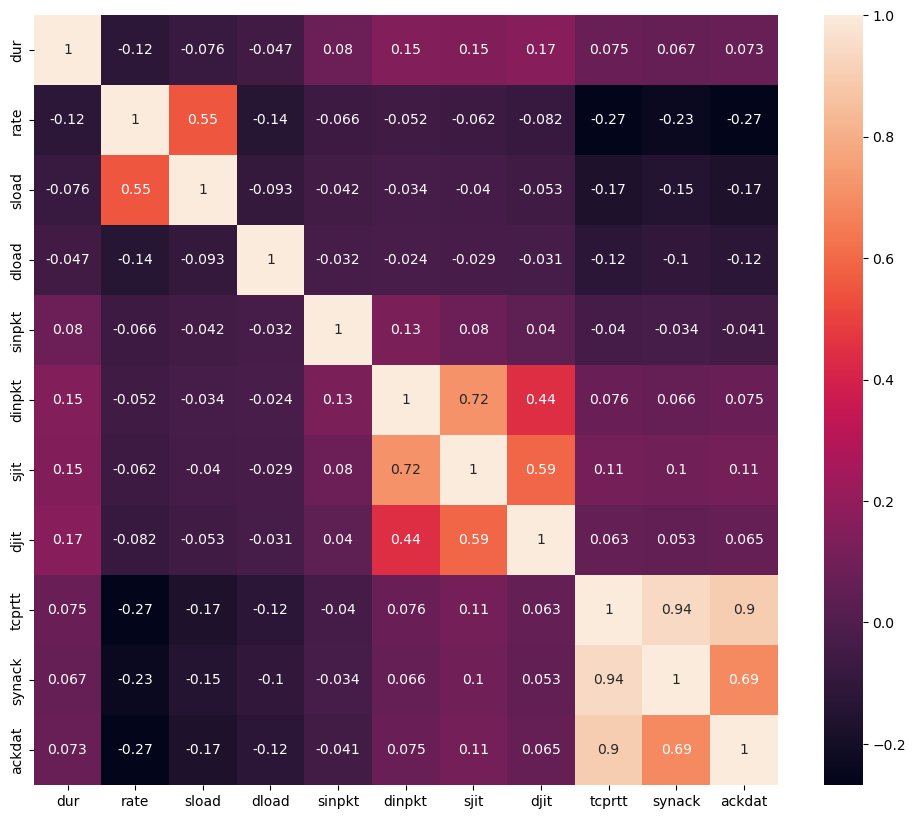

In [49]:
plt.figure(figsize = (12, 10))
sns.heatmap(X_train.select_dtypes("float").corr(), annot=True)

In [50]:
# for col in X_train.select_dtypes("float"):
#     plt.figure()
#     sns.distplot(X_train[col])    # les variables ne sont pas normalisees

### .Standardisation

In [51]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [52]:
X_train.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0
3,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0


In [53]:
X_test.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0


In [54]:

numCols = X_train.select_dtypes(exclude=object)
nameNumCols = numCols.columns
print(nameNumCols)
numCols

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object')


,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0.000011,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,0,0,0.011000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0
1,0.000008,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,0,0,0.008000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0
2,0.000005,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,0,0,0.005000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0
3,0.000006,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,0,0,0.006000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0
4,0.000010,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,0,0,0.010000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,0,0,0.005000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,52,0,0,0,1,2,2,1,1,2,0,0,0,2,1,0
82328,1.106101,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,7,1,55.880051,143.7,4798.130981,190.980813,255,1072535109,3284291478,255,0.173208,0.100191,0.073017,903,44,0,0,1,1,2,1,1,1,0,0,0,3,2,0
82329,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.720000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1
82330,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.732000,0.0,10.954518,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1


In [55]:
scaler = StandardScaler()
scaledTrain = scaler.fit_transform(X_train.select_dtypes(exclude = object))
scaledTest = scaler.transform(X_test.select_dtypes(exclude = object))

# scaler.fit_transform(X_train.select_dtypes("float"))
# scaler.transform(X_test.select_dtypes("float"))

In [56]:
def applyScaling(data, column):
    index = 0
    for floatCol in data.select_dtypes(exclude = object):
        data[floatCol] = column[:, index]
        index += 1
    
    return data

In [57]:
X_train.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0
3,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0


In [58]:
X_train = applyScaling(X_train, scaledTrain)
X_test = applyScaling(X_test, scaledTest)
X_train.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,-0.213727,udp,-,INT,-0.124455,-0.151816,-0.043684,-0.087369,0.057181,0.71944,-0.820395,0.643913,-0.263498,-0.073531,-0.113244,-0.122179,-0.094169,-0.112177,-0.147218,-1.04792,-0.77984,-0.776754,-1.006244,-0.482025,-0.41291,-0.484073,0.520319,-0.475371,-0.173648,-0.04191,-0.680474,0.591021,-0.563660,-0.468312,-0.450186,-0.477994,-0.090857,-0.090617,-0.203143,-0.640033,-0.644190,-0.10607
1,-0.213728,udp,-,INT,-0.124455,-0.151816,-0.036308,-0.087369,0.286565,0.71944,-0.820395,4.539351,-0.263498,-0.073531,-0.113244,-0.122180,-0.094169,-0.112177,-0.147218,-1.04792,-0.77984,-0.776754,-1.006244,-0.482025,-0.41291,-0.484073,3.556716,-0.475371,-0.173648,-0.04191,-0.680474,0.591021,-0.563660,-0.468312,-0.450186,-0.477994,-0.090857,-0.090617,-0.203143,-0.640033,-0.644190,-0.10607
2,-0.213729,udp,-,INT,-0.124455,-0.151816,-0.040351,-0.087369,0.791209,0.71944,-0.820395,4.391459,-0.263498,-0.073531,-0.113244,-0.122180,-0.094169,-0.112177,-0.147218,-1.04792,-0.77984,-0.776754,-1.006244,-0.482025,-0.41291,-0.484073,1.892214,-0.475371,-0.173648,-0.04191,-0.590304,0.591021,-0.563660,-0.468312,-0.450186,-0.390391,-0.090857,-0.090617,-0.203143,-0.640033,-0.554273,-0.10607
3,-0.213729,udp,-,INT,-0.124455,-0.151816,-0.041330,-0.087369,0.566923,0.71944,-0.820395,2.977031,-0.263498,-0.073531,-0.113244,-0.122180,-0.094169,-0.112177,-0.147218,-1.04792,-0.77984,-0.776754,-1.006244,-0.482025,-0.41291,-0.484073,1.489280,-0.475371,-0.173648,-0.04191,-0.590304,0.591021,-0.444868,-0.349115,-0.450186,-0.390391,-0.090857,-0.090617,-0.203143,-0.522990,-0.554273,-0.10607
4,-0.213728,udp,-,INT,-0.124455,-0.151816,-0.034187,-0.087369,0.118350,0.71944,-0.820395,4.369219,-0.263498,-0.073531,-0.113244,-0.122179,-0.094169,-0.112177,-0.147218,-1.04792,-0.77984,-0.776754,-1.006244,-0.482025,-0.41291,-0.484073,4.429740,-0.475371,-0.173648,-0.04191,-0.590304,0.591021,-0.444868,-0.349115,-0.450186,-0.390391,-0.090857,-0.090617,-0.203143,-0.522990,-0.554273,-0.10607


### .Encodage (Label Encoding et One Hot Encoding)

In [59]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [60]:
#cross_val_score(SVC(), X_train, y_train, cv = 5, scoring = "accuracy").mean()

In [61]:
LEncoder = LabelEncoder()

In [62]:
y_train = LEncoder.fit_transform(y_train)
y_test = LEncoder.fit_transform(y_test)

/home/adxnane/.local/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adxnane/.local/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
y_train[:2]

array([6, 6])

In [64]:
from sklearn.compose import make_column_transformer

In [65]:
columns_transformed = make_column_transformer((OneHotEncoder(handle_unknown = "ignore"), ["proto", "service", "state"]), remainder = "passthrough")

In [66]:
X_train.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,-0.213727,udp,-,INT,-0.124455,-0.151816,-0.043684,-0.087369,0.057181,0.71944,-0.820395,0.643913,-0.263498,-0.073531,-0.113244,-0.122179,-0.094169,-0.112177,-0.147218,-1.04792,-0.77984,-0.776754,-1.006244,-0.482025,-0.41291,-0.484073,0.520319,-0.475371,-0.173648,-0.04191,-0.680474,0.591021,-0.563660,-0.468312,-0.450186,-0.477994,-0.090857,-0.090617,-0.203143,-0.640033,-0.644190,-0.10607
1,-0.213728,udp,-,INT,-0.124455,-0.151816,-0.036308,-0.087369,0.286565,0.71944,-0.820395,4.539351,-0.263498,-0.073531,-0.113244,-0.122180,-0.094169,-0.112177,-0.147218,-1.04792,-0.77984,-0.776754,-1.006244,-0.482025,-0.41291,-0.484073,3.556716,-0.475371,-0.173648,-0.04191,-0.680474,0.591021,-0.563660,-0.468312,-0.450186,-0.477994,-0.090857,-0.090617,-0.203143,-0.640033,-0.644190,-0.10607
2,-0.213729,udp,-,INT,-0.124455,-0.151816,-0.040351,-0.087369,0.791209,0.71944,-0.820395,4.391459,-0.263498,-0.073531,-0.113244,-0.122180,-0.094169,-0.112177,-0.147218,-1.04792,-0.77984,-0.776754,-1.006244,-0.482025,-0.41291,-0.484073,1.892214,-0.475371,-0.173648,-0.04191,-0.590304,0.591021,-0.563660,-0.468312,-0.450186,-0.390391,-0.090857,-0.090617,-0.203143,-0.640033,-0.554273,-0.10607
3,-0.213729,udp,-,INT,-0.124455,-0.151816,-0.041330,-0.087369,0.566923,0.71944,-0.820395,2.977031,-0.263498,-0.073531,-0.113244,-0.122180,-0.094169,-0.112177,-0.147218,-1.04792,-0.77984,-0.776754,-1.006244,-0.482025,-0.41291,-0.484073,1.489280,-0.475371,-0.173648,-0.04191,-0.590304,0.591021,-0.444868,-0.349115,-0.450186,-0.390391,-0.090857,-0.090617,-0.203143,-0.522990,-0.554273,-0.10607
4,-0.213728,udp,-,INT,-0.124455,-0.151816,-0.034187,-0.087369,0.118350,0.71944,-0.820395,4.369219,-0.263498,-0.073531,-0.113244,-0.122179,-0.094169,-0.112177,-0.147218,-1.04792,-0.77984,-0.776754,-1.006244,-0.482025,-0.41291,-0.484073,4.429740,-0.475371,-0.173648,-0.04191,-0.590304,0.591021,-0.444868,-0.349115,-0.450186,-0.390391,-0.090857,-0.090617,-0.203143,-0.522990,-0.554273,-0.10607


In [67]:
X_train = columns_transformed.fit_transform(X_train).toarray()
X_test = columns_transformed.transform(X_test).toarray()

In [68]:
print(X_train.shape)
print(X_test.shape)

(82332, 190)
(175341, 190)


In [69]:
# X_train.head()

### .Modélisation

In [70]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
# from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV

In [71]:
# params = {
#     "gamma": [1e-3, 1e-4],
#     "C": [1, 10, 100, 1000]
# }

In [72]:
# model = make_pipeline(columns_transformed, SVC())
# model = GridSearchCV(SVC(random_state = 0), param_grid = params, cv = 5)
# model.fit(X_train, y_train)
# print(model.score(X_test, y_test))
# print(model.best_params_)

model = SVC() 
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7265385734083871

In [73]:
LEncoder.inverse_transform(model.classes_)

array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Shellcode', 'Worms'], dtype=object)

### sans suppression des lignes dupliquees :
- **KNN** : premier essai avec 1hot encoding : score : 0.62, avec suppression des lignes dupliquees : 0.60
- **SVM** : seulement 1hot encoding: 0.44, apres standardization(float columns only): 0.44, apres standardization (complet): 0.72
- **decision tree** : 0.73

### avec suppression :
- **KNN** : 
- **SVM** : 0.68
- **decision tree** : 0.73

In [77]:
# TODO: multiclass confusion matrix, bagging boosting stacking

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [75]:
def evaluation(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test, y_pred))
    confusion_matrice = confusion_matrix(y_test, y_pred, labels = model.classes_)

    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrice, display_labels = LEncoder.inverse_transform(model.classes_))
    fig, ax = plt.subplots(figsize=(14, 12))
    cm_display.plot(ax = ax)

/home/adxnane/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adxnane/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adxnane/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2000
           1       0.00      0.00      0.00      1746
           2       0.34      0.62      0.44     12264
           3       0.71      0.60      0.65     33393
           4       0.66      0.07      0.12     18184
           5       0.99      0.98      0.99     40000
           6       0.71      0.98      0.82     56000
           7       0.75      0.44      0.55     10491
           8       0.00      0.00      0.00      1133
           9       0.00      0.00      0.00       130

    accuracy                           0.73    175341
   macro avg       0.42      0.37      0.36    175341
weighted avg       0.72      0.73      0.69    175341



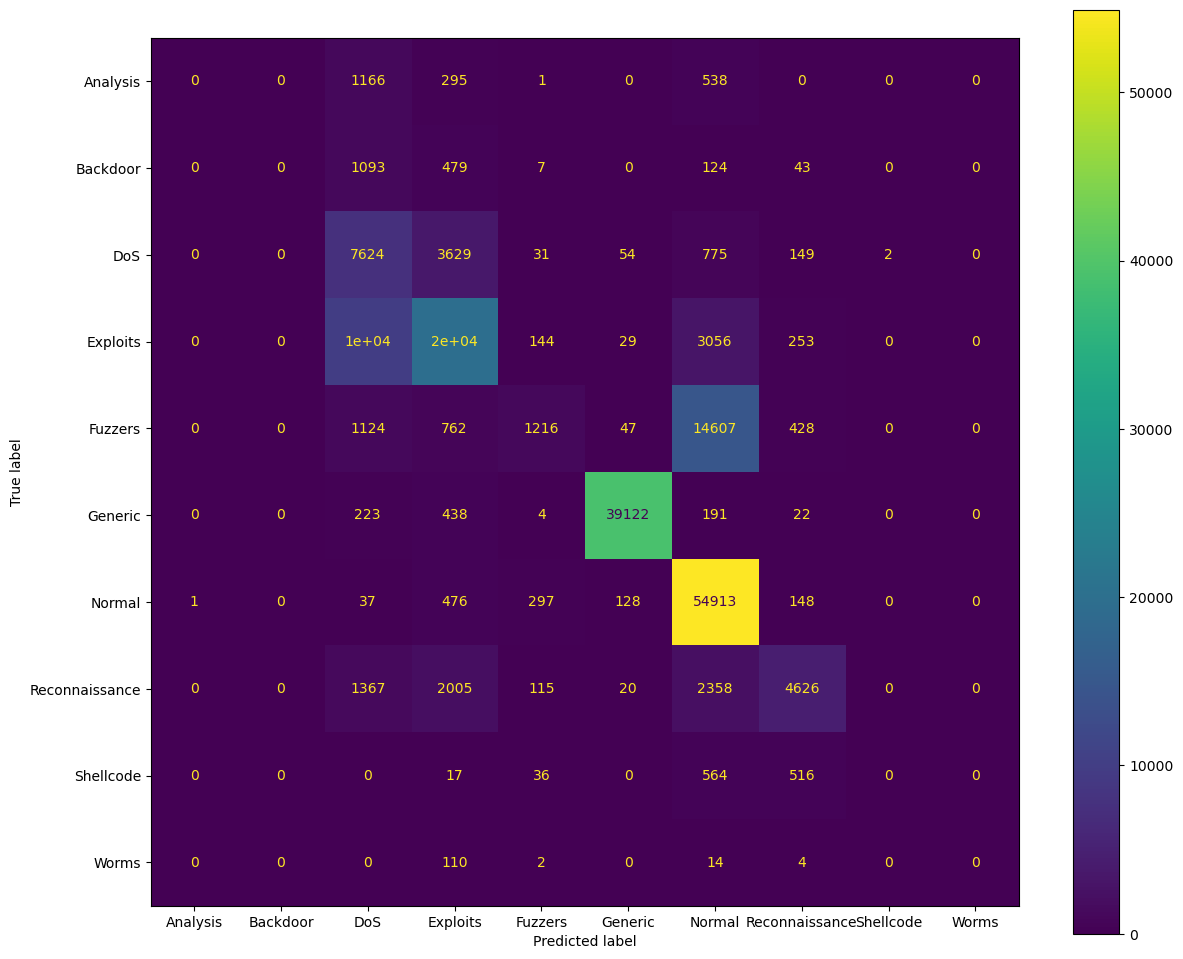

In [76]:
evaluation(model)